# Derivadas 
En algunos casos se dispone de la función pero la derivada es engorrosa de hacer, entonces se pueden usar herramientas de cálculo simbólico para obtener la derivada, en otros casos solo se tiene una tabla de datos con valores de la función y los puntos a los que se evalúa, en este caso se debe implementar la derivada numérica, no obstante habra otros casos en problemas de física en los cuales la derivada numérica sea más computacionalmente eficiente de computar que la derivada analítica, en este documento se estudiará la derivada, finalmente se estudiará como el valor de $h$ influye en la precisión, acá los temas,

1. [Como usar sympy](#Como_usar_sympy).
2. [Derivadas analíticas](#Derivadas_analíticas) usando python y su librería sympy.
3. [Derivadas númericas](#Derivadas_numéricas) por diferencias finitas.
3. [Error en la derivada e inestabilidad](#Error_de_derivada).

<a id='Como_usar_sympy'></a>
## Como usar sympy

Sympy es la librería para cálculos simbólicos en python, también tiene definidas las funciones, `sin(x)`, `cos(x)`, `log(x)`, `exp(x)`, `pi`, etc, pero de manera simbólica, se pueden importar usando, 
```python 
    from sympy import *
```
o también,
```python
    import sympy as sp
```
Aquí utilizamos la primera forma, para evitar confusiones con las funciones numéricas de numpy estas se importarán como,
```python
    import numpy as np
```
así, en numpy las funciones serán: `np.sin(x)`, `np.log(x)`, `np.exp(x)`, etc. 
  
IMPORTANTE: No usar `%pylab` después de importar sympy como `"from sympy import *"`, puesto que este comando usa `"from numpy import *"` y numpy sobrepone sus funciones sobre las de sympy, lo correcto es,
```python
    %pylab
    from sympy import *
```
así por ejemplo `exp(x)`, `pi`, etc son sympy (cálculos simbólicos) y `np.exp(x)`, `np.pi`, son numpy (cálculos con arrays numpy).

Si se usa por ejemplo, `np.log(x)` en manera simbolica o `log(x)` de manera númerica, dará error.

Para más, ver [Tutorial sympy](https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/12-symbolic-computation.html).

<a id='Derivadas_analíticas'></a>
## Derivadas analíticas usando python y su librería sympy 

Para calcular derivada se usa el comando `sympy.diff()`, en cualquiera de las siguientes dos maneras,
```python
    f.diff(x,n) # derivada de orden n
    diff(f,x,n)
```    
pero primero se define la la variable $x$ mediante el comando `sp.Symbol()` o `sp.symbols()`. Ejemplo, consideremos la función,
$$f(t)=\frac{10 \log{\left (t^{2} + t + 1 \right )}}{10 t^{3} - 20 t^{2} + t - 2}$$

In [1]:
# NOTA: el comando sympy.init_printing() imprime los resultados en latex
#       es decir, habilita el output en latex para jupyter/ipython

from sympy import *
import sympy as sp
import numpy as np 
sp.init_printing(use_latex='mathjax') # nice print!!!
import matplotlib.pyplot as plt

In [2]:
# Ejemplo 1)
t         = Symbol ('t')       # definir un solo símbolo,
# x,y,z,t = symbols('x,y,z,t') # definir varios símbolos, 
# x,y,z,t = symbols('x y z t') # también funciona. 
# x,y,z,t = symbols('xyzt')    # NO funciona en python 3.x (pero si en 2.7)

y = 10*log(t**2+t+1)/(10*t**3-20*t**2+t-2) # crear una función simbólica
# print(y), print(display(y))  # comparar print() y display()
y # imprimir la función (de click derecho sobre la función, escoja Show Math As y escoja)

        ⎛ 2        ⎞ 
  10⋅log⎝t  + t + 1⎠ 
─────────────────────
    3       2        
10⋅t  - 20⋅t  + t - 2

In [3]:
# 1) Derivada analítica de y en t
dy = y.diff(t)                                
#dy = (10*log(t**2+t+1)/(10*t**3 - 20*t**2 +t-2).diff(t) # otra alternativa

# 2) Note otra forma de tener la derivada analítica:
diff(y,t)
#diff(10*log(t**2+t+1)/(10*t**3 - 20*t**2 +t-2),t)
# la derivada analítica es más complicada de calcular:

                                          ⎛      2           ⎞    ⎛ 2        ⎞
            10⋅(2⋅t + 1)               10⋅⎝- 30⋅t  + 40⋅t - 1⎠⋅log⎝t  + t + 1⎠
──────────────────────────────────── + ───────────────────────────────────────
⎛ 2        ⎞ ⎛    3       2        ⎞                                  2       
⎝t  + t + 1⎠⋅⎝10⋅t  - 20⋅t  + t - 2⎠           ⎛    3       2        ⎞        
                                               ⎝10⋅t  - 20⋅t  + t - 2⎠        

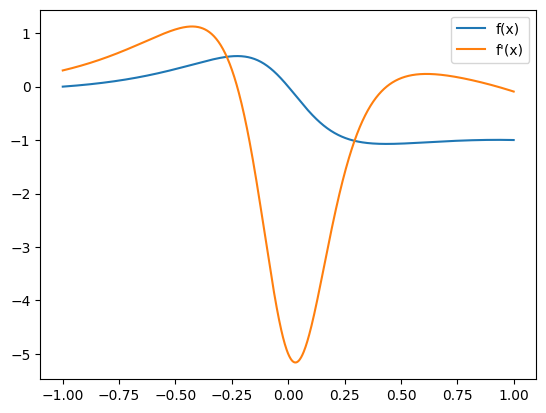

In [4]:
# Se usa lambdify para crear una forma numérica de las funciones:
f  = lambdify(t, y , 'numpy') # crea función f(t) y que puede ser usada en numpy
df = lambdify(t, dy, 'numpy') # crea función numérica de la derivada

x = np.linspace(-1,1,1000)

plt.plot(x, f(x),label="f(x)")
plt.plot(x,df(x),label="f'(x)")

plt.legend()
plt.show()

In [5]:
# Tarea: repita lo anterior con la función:
# f2 = exp(-t*log(t**2)-t)+2/(sin(t)+2)

<a id='Derivadas_numéricas'></a>
## Derivadas numéricas por diferencias finitas
La derivada númerica se obtiene por definición del límite, o también por serie taylor, así,

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(\xi(x)),$$

despejando la derivada,

$$\boxed{f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(\xi(x)),} $$

donde el último término es el error y es del orden de $O(h)$. Una mejor aproximación es la derivada con error hasta el orden $O(h^2)$, se obtiene de la expansión de taylor,

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x)  + \frac{h^3}{6}f'''(x)+ \frac{h^4}{24}f^{(4)}(\xi(x)),$$

$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x)  - \frac{h^3}{6}f'''(x)+ \frac{h^4}{24}f^{(4)}(\xi(x)),$$

si se restan estas expresiones,

$$f(x+h)-f(x-h) = 2hf'(x) + 2\frac{h^3}{6}f'''(\xi(x)),$$ 

si se despaja la derivada y se conservan términos hasta el orden tres,

$$\boxed{f'(x) = \frac{f(x+h)-f(x-h)}{2h}  - \frac{h^2}{6}f'''(\xi(x)).}$$ 

Esta última expresión se conoce como derivada central. Note que si en vez de restar sumamos y conservamos términos hasta el orden cuatro,

$$f(x+h) + f(x-h)= 2f(x) + h^2f''(x)  + \frac{h^4}{12}f^{(4)}(\xi(x)),$$

de esta expresión se obtiene la fórmula para la segunda derivada

$$h^2f''(x) = f(x+h) + f(x-h) -2f(x) - \frac{h^4}{12}f^{(4)}(\xi(x)),$$

finalmente,

$$\boxed{f''(x) = \frac{f(x+h) + f(x-h) - 2f(x)}{h^2} - \frac{h^2}{12}f^{(4)}(\xi(x)).}$$


In [6]:
# Derivada usando diferencias progresivas, de la definición de límite
Df = lambda f, x, h: (f(x+h) - f(x))/h

# Derivada central
# se obtiene de la expansión en f(x+h) y f(x-h)
Dfc = lambda f, x, h: (f(x+h) - f(x-h))/(2*h)

# Segunda derivada numérica
D2f = lambda f, x, h: (f(x+h) - 2*f(x) + f(x-h))/h**2

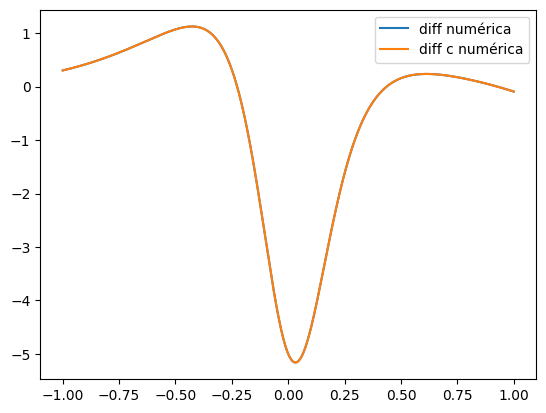

In [7]:
dfn = Df(f, x, 1.e-5)
plt.plot(x,dfn,label='diff numérica')
plt.plot(x,Dfc(f, x, 1.e-5),label='diff c numérica')
plt.legend()

<a id='Error_de_derivada'></a>
## Error en la derivada e inestabilidad
Sea $f'(x) = f'_{num}(x) + e(x)$, donde $f'_{num}$ es una aproximación de la derivada, entonces el error absoluto para derivada al primer orden es,

$$
\begin{eqnarray}
e(x)&=&|f'(x) - f'_{num}(x)|\\\\
    &=&\left|f'(x) - \frac{f(x+h) - f(x)}{h}\right|,
\end{eqnarray}
$$

y para la derivada central (o de segundo orden),

$$e_c(x)=\left|f'(x) - \frac{f(x+h) - f(x-h)}{2h}\right|.$$

Comparación del error para la derivada computada al primer orden y con diferencia central, note que en verdad los errores para el mismo valor de $h$ son del orden de $O(h)$ y $O(h^2)$, miremos el error en la derivada en la función seno:

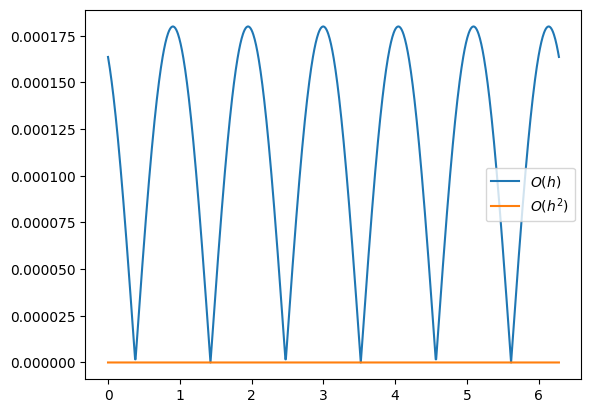

In [8]:
#%matplotlib qt
x = np.linspace(0,2*np.pi,1000)
f = lambda x: 4.*np.sin(3*x + 2)

# Comparación del error de diferencia central y diferencia progresivas en f'(x)
plt.plot(x, np.abs(Df(f, x, 1.e-5) - 12*np.cos(3*x+2)),label='$O(h)$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-5) - 12*np.cos(3*x+2)),label='$O(h^2)$')
plt.legend()

**Tarea**: en el gráfico anterior, a) haga zoom para comparar el valor del error de diferencia central con diferencia a primer orden, b) cambie $h=10^9$ para primer orden y h=$10^3$ para diferencia central, ¿qué concluye? 

No siempre el $h$ más pequeño es el mejor, pues hay que tener un valance entre
$h$ y la diferencia en el numerador (si $h$ es muy pequeño, el numerador tendrá un 
error muy grande, debido a la cancelación sustractiva de dos números muy parecidos, $f(x+h)$ y $f(x-h)$). Miremos como varía el error según el valor de $h$:

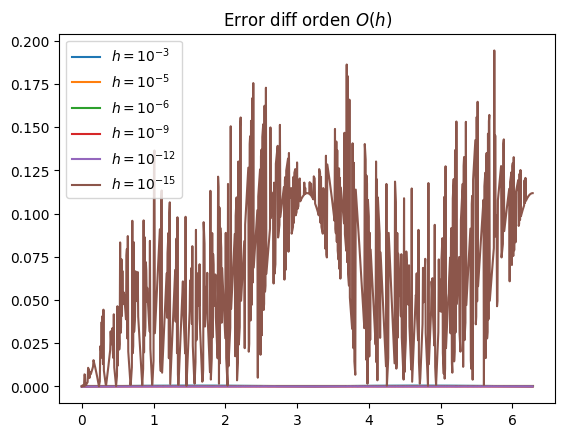

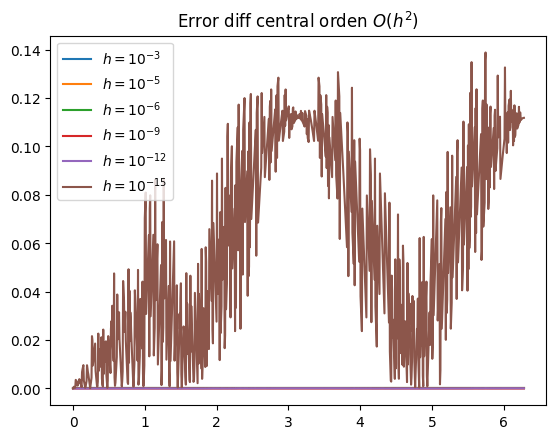

In [9]:
# Use el zoom y compare los valores, para esto descomente la siguiente linea
#%matplotlib qt
x = np.linspace(0,2*np.pi,1000)
f = lambda x: np.sin(x)

# Usando Df(x), cuál es el mejor h? cuál es el error?
plt.figure(2) # usamos otra figura
plt.plot(x, np.abs(Df(f,x, 1.e-3 ) - np.cos(x)), label='$h=10^{-3 }$')
plt.plot(x, np.abs(Df(f,x, 1.e-5 ) - np.cos(x)), label='$h=10^{-5 }$')
plt.plot(x, np.abs(Df(f,x, 1.e-6 ) - np.cos(x)), label='$h=10^{-6 }$')
plt.plot(x, np.abs(Df(f,x, 1.e-9 ) - np.cos(x)), label='$h=10^{-9 }$')
plt.plot(x, np.abs(Df(f,x, 1.e-12) - np.cos(x)), label='$h=10^{-12}$')
plt.plot(x, np.abs(Df(f,x, 1.e-15) - np.cos(x)), label='$h=10^{-15}$')
plt.title('Error diff orden $O(h)$')
plt.legend()
plt.show()

# Usando Dfc(x), cuál es el mejor h? cuál es el error?
# Solucion: 
plt.figure(3) # usamos otra figura
plt.plot(x, np.abs(Dfc(f,x, 1.e-3 ) - np.cos(x)), label='$h=10^{-3 }$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-5 ) - np.cos(x)), label='$h=10^{-5 }$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-6 ) - np.cos(x)), label='$h=10^{-6 }$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-9 ) - np.cos(x)), label='$h=10^{-9 }$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-12) - np.cos(x)), label='$h=10^{-12}$')
plt.plot(x, np.abs(Dfc(f,x, 1.e-15) - np.cos(x)), label='$h=10^{-15}$')
 
plt.title('Error diff central orden $O(h^2)$')
plt.legend()
plt.show()

 De los dos gráficos anteriores, ¿tiene sentido $h = 10^{-15}$? No, el máximo error es del orden de $\sim 0.15$ (o $15$%) comparado a la derivada analítica.
 
 ¿Cuál es el mejor $h$?
 
+   para `Df(x)`  el mejor $h$ es $10^{-9}$ con máximo error $e \sim 10^{-7}$.
+   para `Dfc(x)` el mejor $h$ es $10^{-5}$ con máximo error $e \sim 10^{-11}$.